In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
#폴리움 설치
!pip install folium 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import folium

# 주차장위치 marking


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/시계열공모전/폴리움/폴리움에필요한데이터/광진구주차장_위경도만.csv')
df.head()
df.drop(columns='Unnamed: 0')

,이름,주차면적,위도,경도
0,AJ파크 커먼그라운드 주차장,27,37.541042,127.065652
1,강변 테크노마트,2184,37.535706,127.095676
2,건국대학교 동문회관 주차장,51,37.538325,127.074623
3,건국대학교병원 주차장,659,37.541219,127.072034
4,건국대학교사범대학부속중학교 주차장,100,37.539172,127.074691
...,...,...,...,...
91,한림타워 주차장,215,37.540797,127.068967
92,한승빌딩 주차장,31,37.536525,127.084713
93,행복(민영),16,37.554229,127.086170
94,현대주차장(민영),18,37.532884,127.086033


In [ ]:
#맵위치잡기 -> 광진구청기준
seoul_map = folium.Map(location=[37.538, 127.082],
                       tiles = 'Stamen Terrain',
                       zoom_start=13) 
seoul_map

In [ ]:
#마커위치잡기 - 주차장
for i in range(len(df)):
  marker01 = folium.Marker([df.loc[i]['위도'], df.loc[i]['경도']],
                           icon = folium.Icon(color='blue'), popup=str(df.loc[i]['이름'])+'의 주차면수:'+str(df.loc[i]['주차면적']))
  marker01.add_to(seoul_map)

In [ ]:
seoul_map

# 최대단속위치 marking

In [ ]:
df_dansok = pd.read_excel('/content/gdrive/MyDrive/시계열공모전/폴리움/폴리움에필요한데이터/광진구_불법주차단속_최다지역.xlsx')
df_dansok.head()

,순위,동,주소,단속횟수,누적횟수,위도,경도
0,1,구의동,구의동 리젠트오피스텔건너편,9881,9881.0,37.533558,127.093389
1,2,구의동,구의동 지너스타워주차장앞,8877,18758.0,37.535562,127.093359
2,3,화양동,화양동 건대입구1번출구앞,8257,27015.0,37.541118,127.067913
3,13,중곡동,중곡동 MB모터스옆,6882,33897.0,37.563661,127.078227
4,4,자양동,자양동 건대역약국앞,6700,40597.0,37.541005,127.06741


In [ ]:
df_dansok = df_dansok[:29]
df_dansok

,순위,동,주소,단속횟수,누적횟수,위도,경도
0,1,구의동,구의동 리젠트오피스텔건너편,9881,9881.0,37.533558,127.093389
1,2,구의동,구의동 지너스타워주차장앞,8877,18758.0,37.535562,127.093359
2,3,화양동,화양동 건대입구1번출구앞,8257,27015.0,37.541118,127.067913
3,13,중곡동,중곡동 MB모터스옆,6882,33897.0,37.563661,127.078227
4,4,자양동,자양동 건대역약국앞,6700,40597.0,37.541005,127.06741
5,5,중곡동,중곡동 중곡지구대앞,6113,46710.0,37.563888,127.082772
6,6,중곡동,중곡동 우리은행앞,5277,51987.0,37.557543,127.088122
7,9,자양동,자양동 올포유앞,4961,56948.0,37.536217,127.064557
8,10,자양동,자양동 파리바게트앞,4882,61830.0,37.532199,127.079078
9,11,구의동,구의동 강변스파랜드앞,4760,66590.0,37.535074,127.091264


In [ ]:
#마커위치잡기 - 단속 다회
for i in range(len(df_dansok)):
  marker01 = folium.Marker([df_dansok.loc[i]['위도'], df_dansok.loc[i]['경도']],
                           icon = folium.Icon(color='red'), popup=str(df_dansok.loc[i]['주소'])+'의 단속횟수:'+ str(df_dansok.loc[i]['단속횟수']))
  marker01.add_to(seoul_map)

In [ ]:
seoul_map
#red: 주차단속다회지역
#blue: 주차장위치

# 주차 단속 지역 별 k-means clustering

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [ ]:
df_dansok_cluster = df_dansok[['위도', '경도']]

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

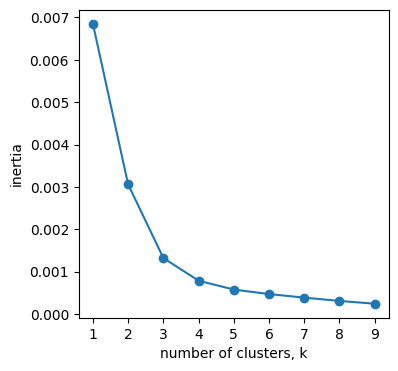

In [ ]:
from sklearn.cluster import KMeans
# 적절한 군집수 찾기
# Inertia(군집 내 거리제곱합의 합) value (적정 군집수)

ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(df_dansok_cluster)
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.figure(figsize=(4, 4))

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

#elbow 방법에 의해 군집4개가 적합하다고 판단

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)


Text(20.250000000000007, 0.5, 'longitude')

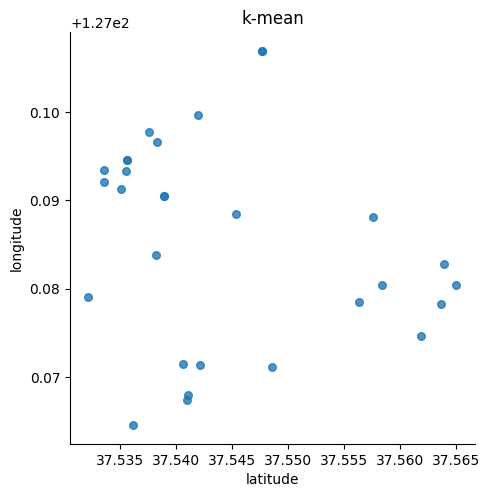

In [ ]:
sb.lmplot( x='위도' , y='경도', data=df_dansok_cluster, fit_reg=False, scatter_kws={"s":30}) 
plt.title('k-mean')
plt.xlabel('latitude')
plt.ylabel('longitude')

In [ ]:
points=df_dansok_cluster.values

In [ ]:
kmeans=KMeans(n_clusters=4).fit(points)
kmeans.cluster_centers_
kmeans.labels_
df_dansok_cluster['cluster'] = kmeans.labels_
df_dansok['군집']=kmeans.labels_ #단속데이터에서도 군집추가

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-78-c40d76b9ae8f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dansok_cluster['cluster'] = kmeans.labels_


/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.9/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.9/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing fr

Text(37.83452083333333, 0.5, 'longitude')

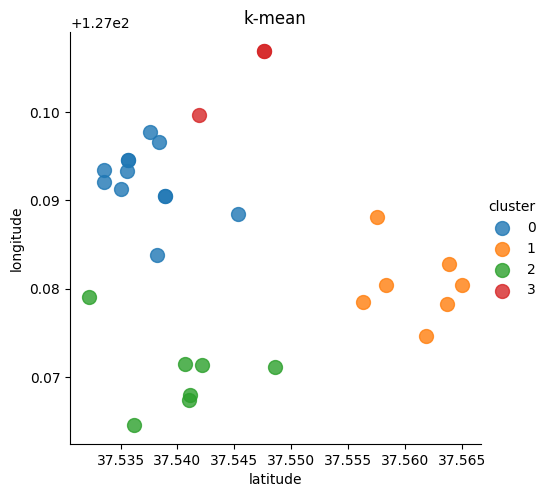

In [ ]:
sb.lmplot( x='위도' , y='경도', data=df_dansok_cluster, fit_reg=False, scatter_kws={"s":100},hue="cluster" )
plt.title('k-mean')
plt.xlabel('latitude')
plt.ylabel('longitude')

# 분류된 군집으로 cluster

In [ ]:
#맵위치잡기 -> 광진구청기준
seoul_map = folium.Map(location=[37.538, 127.082],
                       tiles = 'Stamen Terrain',
                       zoom_start=13) 
seoul_map

In [ ]:
dan0 = df_dansok[df_dansok['군집']==0].reset_index() #purple
dan1 = df_dansok[df_dansok['군집']==1].reset_index() #red
dan2 = df_dansok[df_dansok['군집']==2].reset_index() #yellow
dan3 = df_dansok[df_dansok['군집']==3].reset_index() #orange


In [ ]:

for i in range(len(dan0)):
  marker0 = folium.Marker([dan0.loc[i]['위도'], dan0.loc[i]['경도']],
                           icon = folium.Icon(color='orange'), popup=str(dan0.loc[i]['주소'])+'의 단속횟수:'+ str(dan0.loc[i]['단속횟수']))
  marker0.add_to(seoul_map)

for i in range(len(dan1)):
  marker1 = folium.Marker([dan1.loc[i]['위도'], dan1.loc[i]['경도']],
                           icon = folium.Icon(color='red'), popup=str(dan1.loc[i]['주소'])+'의 단속횟수:'+ str(dan1.loc[i]['단속횟수']))
  marker1.add_to(seoul_map)

for i in range(len(dan2)):
  marker2 = folium.Marker([dan2.loc[i]['위도'], dan2.loc[i]['경도']],
                           icon = folium.Icon(color='gray'), popup=str(dan2.loc[i]['주소'])+'의 단속횟수:'+ str(dan2.loc[i]['단속횟수']))
  marker2.add_to(seoul_map)

for i in range(len(dan3)):
  marker3 = folium.Marker([dan3.loc[i]['위도'], dan3.loc[i]['경도']],
                           icon = folium.Icon(color='purple'), popup=str(dan3.loc[i]['주소'])+'의 단속횟수:'+ str(dan3.loc[i]['단속횟수']))
  marker3.add_to(seoul_map)

In [ ]:
seoul_map

In [ ]:
seoul_map.save('cluster.html')

# 광진구 표시

In [ ]:
gwangjin = [[127.08068541280403,37.56906425519017],[127.08553261581505,37.56856310839328],[127.09327554832984,37.566762290300666],[127.1015990771266,37.56973288819573]
 ,[127.10304174249214,37.57076342290955],[127.10627148043552,37.568124945986824],[127.10545359063936,37.56685230388649],[127.10407152037101,37.55958871940823]
 ,[127.10325742736646,37.5572251707506],[127.11270952006532,37.55702358575743],[127.11519584981606,37.557533180704915],[127.11600943681239,37.55580061507081]
 ,[127.11600200349189,37.55053147511706],[127.11418412219375,37.54474592090681],[127.1116764203608,37.540669955324965],[127.10484130265957,37.53120327509912]
 ,[127.10087519791962,37.524841220167055],[127.0943611414465,37.523984206117525],[127.08639455667742,37.52161824624356],[127.07968915919895,37.52077294752823]
 ,[127.07496309841329,37.52091052765938],[127.0690698130372,37.522279423505026],[127.05867359288398,37.52629974922568],[127.06896218881212,37.544361436565524]
 ,[127.07580697427795,37.556641581290656],[127.07421053024362,37.55724769712085],[127.08068541280403,37.56906425519017]]

In [ ]:
#위도 경도 순서로
gwangjin_new = []
lst = []
for g in gwangjin:
  g[0], g[1] = g[1], g[0]
  gwangjin_new.append(g)

gwangjin_new

[[37.56906425519017, 127.08068541280403],
 [37.56856310839328, 127.08553261581505],
 [37.566762290300666, 127.09327554832984],
 [37.56973288819573, 127.1015990771266],
 [37.57076342290955, 127.10304174249214],
 [37.568124945986824, 127.10627148043552],
 [37.56685230388649, 127.10545359063936],
 [37.55958871940823, 127.10407152037101],
 [37.5572251707506, 127.10325742736646],
 [37.55702358575743, 127.11270952006532],
 [37.557533180704915, 127.11519584981606],
 [37.55580061507081, 127.11600943681239],
 [37.55053147511706, 127.11600200349189],
 [37.54474592090681, 127.11418412219375],
 [37.540669955324965, 127.1116764203608],
 [37.53120327509912, 127.10484130265957],
 [37.524841220167055, 127.10087519791962],
 [37.523984206117525, 127.0943611414465],
 [37.52161824624356, 127.08639455667742],
 [37.52077294752823, 127.07968915919895],
 [37.52091052765938, 127.07496309841329],
 [37.522279423505026, 127.0690698130372],
 [37.52629974922568, 127.05867359288398],
 [37.544361436565524, 127.068962

# 단속많은지역 - 주차면수 간 현황분석 (거리) - 시범용1개

In [ ]:
! pip install haversine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from haversine import haversine

In [ ]:
seoul_map

In [ ]:
dan0

,index,순위,동,주소,단속횟수,누적횟수,위도,경도,군집
0,3,13,중곡동,중곡동 MB모터스옆,6882,33897.0,37.563661,127.078227,0
1,5,5,중곡동,중곡동 중곡지구대앞,6113,46710.0,37.563888,127.082772,0
2,6,6,중곡동,중곡동 우리은행앞,5277,51987.0,37.557543,127.088122,0
3,17,17,중곡동,중곡동 태양주유소앞,2701,95936.0,37.561855,127.074665,0
4,20,33,중곡동,중곡동 신성그랜드타워,2173,103147.0,37.565014,127.080397,0
5,25,22,중곡동,중곡동 고신경정신과의원앞,1703,112298.0,37.558383,127.080377,0
6,26,24,군자동,군자동 군자CGV앞,1276,113574.0,37.556333,127.07849,0


In [ ]:
df[df['이름'] == '능동공영주차장(구)']

,Unnamed: 0,이름,주차면적,위도,경도
24,24,능동공영주차장(구),77,37.554026,127.080217


In [ ]:
# 위경도 입력
dan = (dan0['위도'][6], dan0['경도'][6])
ju = (df[df['이름'] == '능동공영주차장(구)']['위도'][24], 
      df[df['이름'] == '능동공영주차장(구)']['경도'][24])
      
# 거리 계산
distance=haversine(dan, ju, unit = 'm')
distance

298.3376998802581

In [ ]:
dan = [dan0['위도'][6], dan0['경도'][6]]
ju = [float(df[df['이름'] == '능동공영주차장(구)']['위도'][24]), 
      float(df[df['이름'] == '능동공영주차장(구)']['경도'][24])]

loc = dan, ju

folium.PolyLine(locations = loc, tooltip='Polyline', popup=distance, color='red' ).add_to(seoul_map)

In [ ]:
seoul_map

# 건대입구/동서울터미널 구역 설정 folium
; 건대입구 주변에는 주차장 수는 많으나, 실제 댈 수 있는 면수가 적고

: 동서울터미널 주변은 주차장 수와 면적 모두 부족

; 중곡동 역시 불법주차가 많은 지역이지만 주차장 건설을 계획하고 있고 주변 주차장이 많은 것으로 판단 -> 공유주차나 실시간 주차로 해결하면 좋을듯

## 건대입구

In [ ]:
sector =[[37.542164,	127.071299], #화양동 건대분수광장건너편
        [37.54206, 127.06511], #청화주차장(민영)
        [37.540224,	127.063094], #명성 주차장
        [37.53831,	127.068694], #이삭주차장(민영)
        [37.540663,	127.071413], #화양동 건대입구3번출구앞
        [37.542164,	127.071299]

]

sector  

[[37.542164, 127.071299],
 [37.54206, 127.06511],
 [37.540224, 127.063094],
 [37.53831, 127.068694],
 [37.540663, 127.071413],
 [37.542164, 127.071299]]

In [ ]:
folium.PolyLine(locations = sector, tooltip='Polygon', fill_color='BuPu', color='red').add_to(seoul_map)
seoul_map

## 구의동(동서울터미널)

In [ ]:
sector2 =[[37.537558,	127.097672], #구의동 현대프라임아파트
        [37.538347,	127.09662], #구의동 현대아파트
        [37.535074,	127.091264], #구의동 강변스파랜드앞
        [37.533502,	127.091396], #동서울 노외주차장(구)
        [37.532772,	127.091995], #동서울 호텔길(B) 공영주차장(구)
        [37.534013,	127.094701], #터미널유료주차장(민영)
        [37.537558,	127.097672] #구의동 현대프라임아파트
]

sector2

[[37.537558, 127.097672],
 [37.538347, 127.09662],
 [37.535074, 127.091264],
 [37.533502, 127.091396],
 [37.532772, 127.091995],
 [37.534013, 127.094701],
 [37.537558, 127.097672]]

In [ ]:
folium.PolyLine(locations = sector2, tooltip='Polygon', fill_color='BuPu', color='red').add_to(seoul_map)
seoul_map